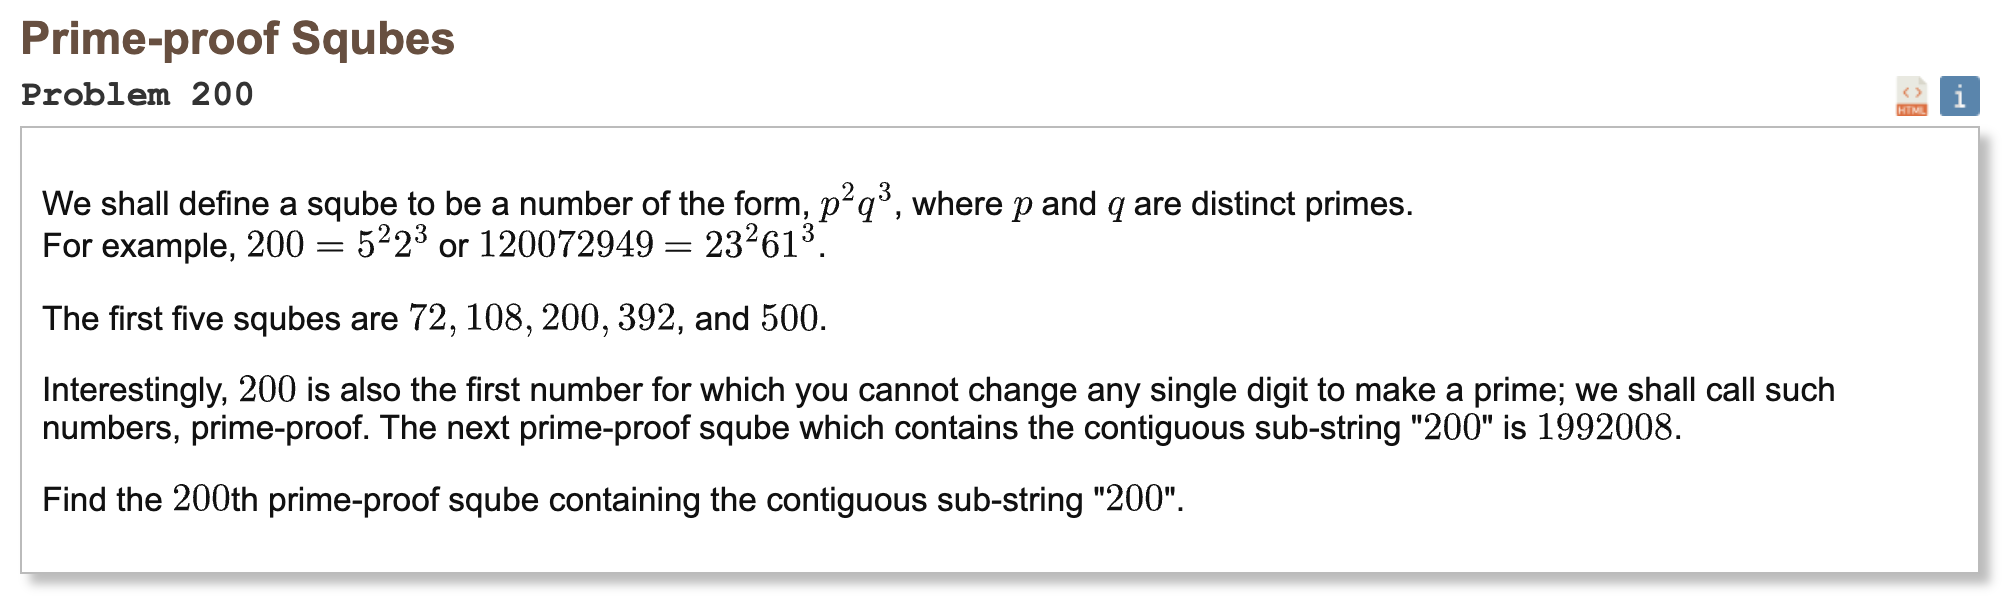

## Initial approach

* generate squbes of the form p^2 q^3 with p and q distinct primes and keep them in increasing order
* only keep squbes whose decimal form contains the contiguous substring 200
* test prime proof by trying every single digit change and rejecting the number if any change makes it prime
* use a fast deterministic miller rabin test so the many primality checks stay quick
* search within a growing upper limit until you have found at least 200 valid squbes
* sort the valid squbes and take the 200th one

In [1]:
import math

def sieve(n):
    bs = bytearray(b"\x01") * (n + 1)
    bs[0:2] = b"\x00\x00"
    r = int(n ** 0.5)
    for p in range(2, r + 1):
        if bs[p]:
            start = p * p
            step = p
            bs[start:n + 1:step] = b"\x00" * (((n - start) // step) + 1)
    return [i for i in range(n + 1) if bs[i]]

def is_prime(n):
    if n < 2:
        return False
    small = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37]
    for p in small:
        if n % p == 0:
            return n == p
    d = n - 1
    s = 0
    while d % 2 == 0:
        s += 1
        d //= 2
    for a in (2, 325, 9375, 28178, 450775, 9780504, 1795265022):
        if a % n == 0:
            continue
        x = pow(a, d, n)
        if x == 1 or x == n - 1:
            continue
        for _ in range(s - 1):
            x = (x * x) % n
            if x == n - 1:
                break
        else:
            return False
    return True

def prime_proof(n):
    s = str(n)
    for i, ch in enumerate(s):
        for d in "0123456789":
            if d == ch:
                continue
            if i == 0 and d == "0":
                continue
            m = int(s[:i] + d + s[i + 1:])
            if is_prime(m):
                return False
    return True

def nth_prime_proof_sqube_with_200(target_n):
    limit = 10**12
    while True:
        max_p = int(math.isqrt(limit // 8)) + 1
        max_q = int(round(limit ** (1.0 / 3.0))) + 2
        primes = sieve(max(max_p, max_q))

        candidates = set()
        for q in primes:
            q3 = q * q * q
            if q3 > limit:
                break
            max_p_here = int(math.isqrt(limit // q3))
            for p in primes:
                if p > max_p_here:
                    break
                if p == q:
                    continue
                v = p * p * q3
                if "200" in str(v):
                    candidates.add(v)

        good = []
        for v in sorted(candidates):
            if prime_proof(v):
                good.append(v)
                if len(good) >= target_n:
                    return good[target_n - 1]

In [2]:
%time
result = nth_prime_proof_sqube_with_200(200)
print("Result:", result)

CPU times: user 5 μs, sys: 1 μs, total: 6 μs
Wall time: 12.2 μs
Result: 229161792008
